In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from post_processing import post_processing

In [5]:
if False:
    basedir = "output_zero\\raw"
    for x in os.listdir(basedir):
        old_path = os.path.join(basedir, x)
        new_path = os.path.join(basedir, x[18:])
        os.rename(old_path, new_path)

In [7]:
str(1.1).replace(".", "_")

'1_1'

In [21]:
p_values = [1.1, 1.2, 1.25]
slopes = [0.1, 1, 10]

def foo(x):
    return str(float(x)).replace(".", "_")

filepaths = [[os.path.join("output_zero","raw", f"p{foo(p)}_s{foo(s)}.h5") 
              for p in p_values] for s in slopes]
filepaths

[['output_zero\\raw\\p1_1_s0_1.h5',
  'output_zero\\raw\\p1_2_s0_1.h5',
  'output_zero\\raw\\p1_25_s0_1.h5'],
 ['output_zero\\raw\\p1_1_s1_0.h5',
  'output_zero\\raw\\p1_2_s1_0.h5',
  'output_zero\\raw\\p1_25_s1_0.h5'],
 ['output_zero\\raw\\p1_1_s10_0.h5',
  'output_zero\\raw\\p1_2_s10_0.h5',
  'output_zero\\raw\\p1_25_s10_0.h5']]

In [22]:
processed_table = [[post_processing(element) for element in row] for row in filepaths]

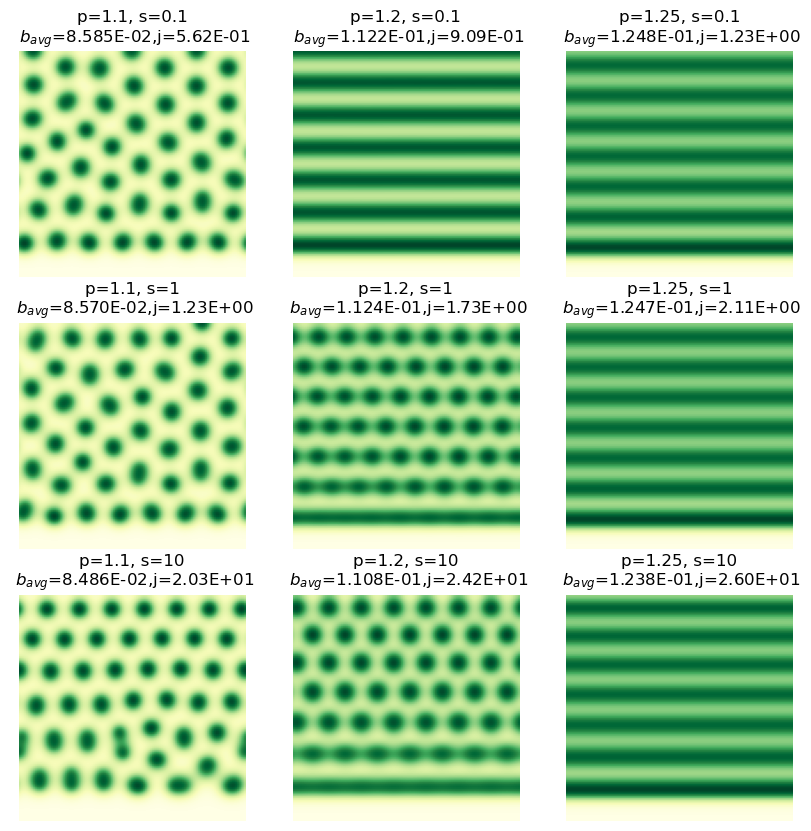

In [30]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

for i in range(3):
    for j in range(3):
        processed = processed_table[i][j]
        b = processed["vegetation"]
        w = processed["soil_water"]
        h = processed["surface_water"]
        flux = processed["flux"]
        ts = processed["times"]
        
        axs[i,j].imshow(b[-1], cmap="YlGn", origin="lower")
        axs[i,j].set_title(f"p={p_values[j]}, s={slopes[i]}\n $b_{'{avg}'}$={np.mean(b[-1]):.3E},j={flux[-1, 0, :].sum():.2E}")
        axs[i,j].axis("off")

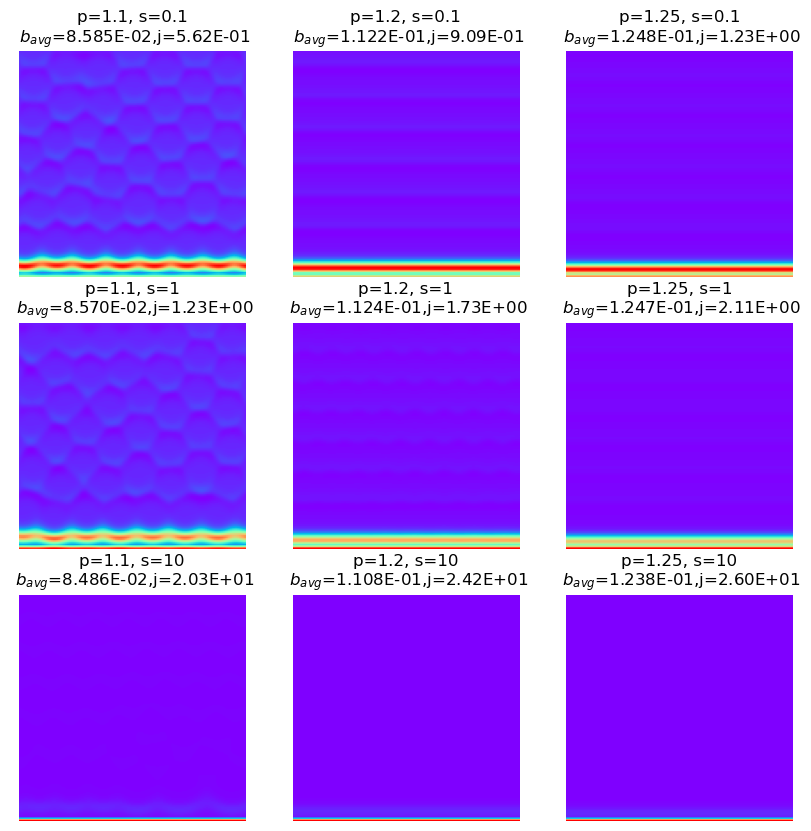

In [35]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

for i in range(3):
    for j in range(3):
        processed = processed_table[i][j]
        b = processed["vegetation"]
        w = processed["soil_water"]
        h = processed["surface_water"]
        flux = processed["flux"]
        ts = processed["times"]
        
        axs[i,j].imshow(flux[-1], cmap="rainbow", origin="lower")
        axs[i,j].set_title(f"p={p_values[j]}, s={slopes[i]}\n $b_{'{avg}'}$={np.mean(b[-1]):.3E},j={flux[-1, 0, :].sum():.2E}")
        axs[i,j].axis("off")

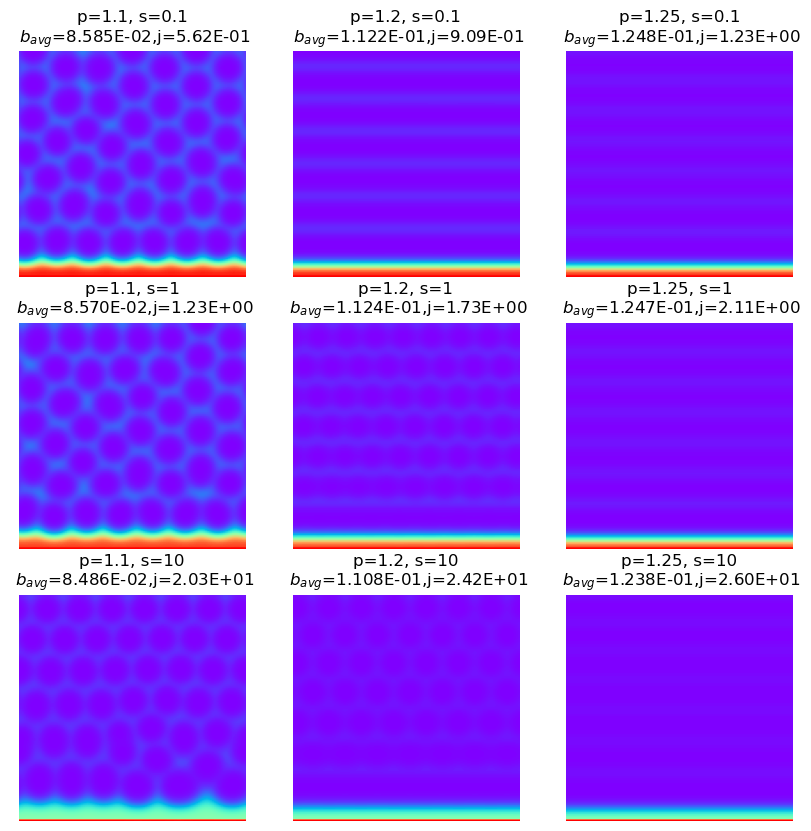

In [37]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

for i in range(3):
    for j in range(3):
        processed = processed_table[i][j]
        b = processed["vegetation"]
        w = processed["soil_water"]
        h = processed["surface_water"]
        flux = processed["flux"]
        ts = processed["times"]
        
        axs[i,j].imshow(h[-1], cmap="rainbow", origin="lower")
        axs[i,j].set_title(f"p={p_values[j]}, s={slopes[i]}\n $b_{'{avg}'}$={np.mean(b[-1]):.3E},j={flux[-1, 0, :].sum():.2E}")
        axs[i,j].axis("off")